## Bayesian Hierarchical Clustering (Pavleen Kaur-873230233)

Three cases have been explored:

## Case 1: 

Data containing same values for a particular class


## Case 2:

Data generated using normal distribution with mean=0 and varying standard deviations:

The data contains 7 time series/rows generated as normal distributions from same mean and different standard deviations with 5 column values in each row. We can consider these 5 columns as feature values. Row 1 and 2 are generated using rnorm(mean=0,sd=1). Row 3,4,5 are generated using rnorm(mean=0,sd=2). Row 6 is generated using rnorm(mean=0,sd=3) and row 7 is generated using (mean=0,sd=10).

So we already know that data should be clustered into four clusters with row 1 and 2 being cluster 1, row 3,4,5 being cluster 2 and row 6 and row 7 as separate clusters. We also insert data without and with class column where each cluster is represented by numbers 1,2,3 and 4.


## Case 3:
Data generated using different distributions (normal, poisson,gaussian and beta distributions)

The data has 6 rows or time series generated from different distributions. Here row 1 is a time series with 30 instance values drawn from normal distribution. Row 2 is a time series of 30 instances drawn from poisson distribution, Row 3 is a time series from gamma distribution and row 4,5 and 6 are drawn from beta distributions with
x<-rbeta(N,5,2)
y<-rbeta(N,2,5)
z<-rbeta(N,5,5)

So we should have 6 separate clusters here.





In [1]:
#Downloading BHC package

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.12")

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)



In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)



In [2]:
library(BHC)

In [7]:
install.packages("argparse")

Installing package into 'C:/Users/pavle/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependency 'findpython'




package 'findpython' successfully unpacked and MD5 sums checked
package 'argparse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pavle\AppData\Local\Temp\RtmpWSqRiJ\downloaded_packages


In [3]:
#list of all libraries needed for the code


library(argparse)
library(RColorBrewer)
library(BHC)
library(parallel)


## Case 1

In [130]:

data         <- matrix(0,15,50)
itemLabels   <- vector("character",15)
data[1:5,]   <- sample(0:1,250, replace=TRUE,prob=c(0.1,0.9)); itemLabels[1:5]  <- "a"
data[6:10,]   <- sample(0:1,250, replace=TRUE,prob=c(0.5,0.5)); itemLabels[6:10]   <- "b"
data[11:15,]   <- sample(0:1,250, replace=TRUE,prob=c(0.9,0.1)); itemLabels[11:15]   <- "c"
#data[6:10,]  <- 2 ; itemLabels[6:10]  <- "b"
#data[11:15,] <- 3 ; itemLabels[11:15] <- "c"
#data[1:5,]
data
##DATA DIMENSIONS
nDataItems <- nrow(data)
nFeatures  <- ncol(data)

##RUN MULTINOMIAL CLUSTERING
hc1 <- bhc(data, itemLabels, verbose=TRUE)



0,1,0,1,1,1,1,1,1,1,⋯,0,1,0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,⋯,0,1,1,1,0,1,1,1,1,1
1,1,1,1,1,0,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
1,1,0,0,1,1,0,1,1,0,⋯,1,1,0,1,1,1,1,1,1,1
0,1,1,0,0,0,0,1,1,0,⋯,1,1,0,0,0,1,1,0,0,1
0,1,0,0,0,0,0,1,0,1,⋯,0,1,0,1,0,1,1,1,1,1
1,0,1,0,1,1,1,1,1,1,⋯,1,1,1,1,0,1,0,1,1,0
0,1,0,0,0,1,0,1,1,1,⋯,1,1,1,1,0,1,1,0,1,0
1,0,1,0,1,1,1,1,1,0,⋯,0,0,0,1,1,1,0,1,0,0
1,0,0,0,1,1,0,0,0,0,⋯,0,0,0,0,0,1,0,1,0,0


[1] Running Bayesian Hierarchical Clustering....
[1] "DataType: multinomial"
[1] Optimising global hyperparameter...
[1]    0.9184405 -427.6238514
[1]    1.331559 -432.392343
[1]    0.5851072 -427.2266048
[1]    0.5851072 -427.2266048
[1]    0.5851072 -427.2266048
[1] Hyperparameter: 0.58510717266852
[1] Lower bound on overall LogEvidence: -4.2723e+02
[1] *******************


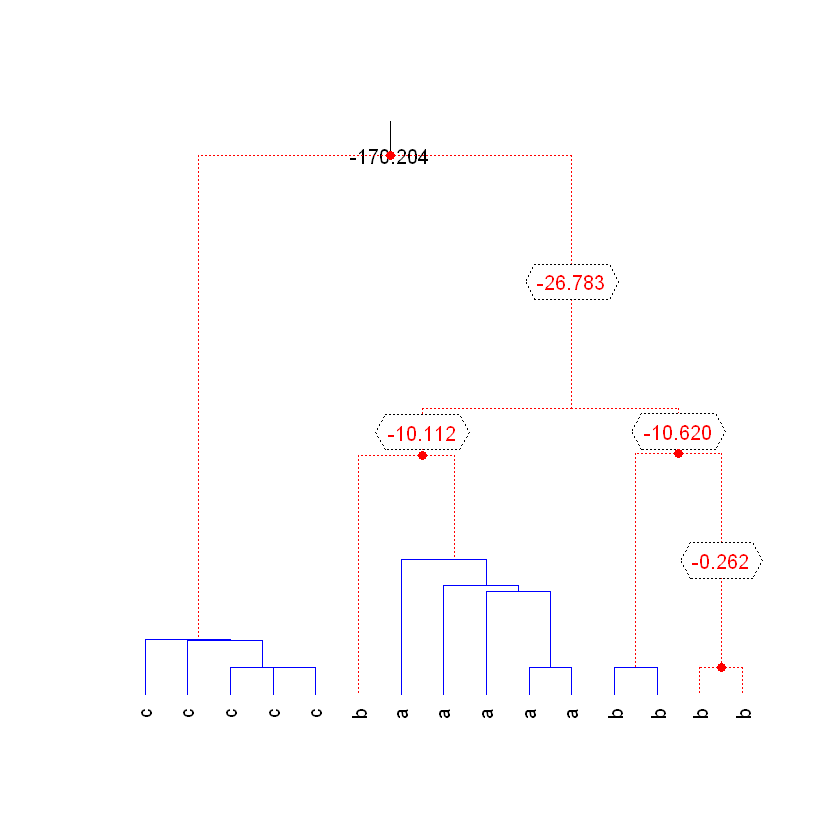

In [131]:
#Dendogram plot
plot(hc1, axes=FALSE)

In [132]:
#write out clusters
WriteOutClusterLabels(hc1, 'case1.txt', verbose=TRUE)

[1] ---CLUSTER 1 ---
[1] c
[1] c
[1] c
[1] c
[1] c
[1] ---CLUSTER 2 ---
[1] b
[1] ---CLUSTER 3 ---
[1] a
[1] a
[1] a
[1] a
[1] a
[1] ---CLUSTER 4 ---
[1] b
[1] b
[1] ---CLUSTER 5 ---
[1] b
[1] ---CLUSTER 6 ---
[1] b


## Case 2

[1] 62.50 88.22 28.04 39.85 76.26

[1] 66.90 20.46 35.75 35.95 69.03

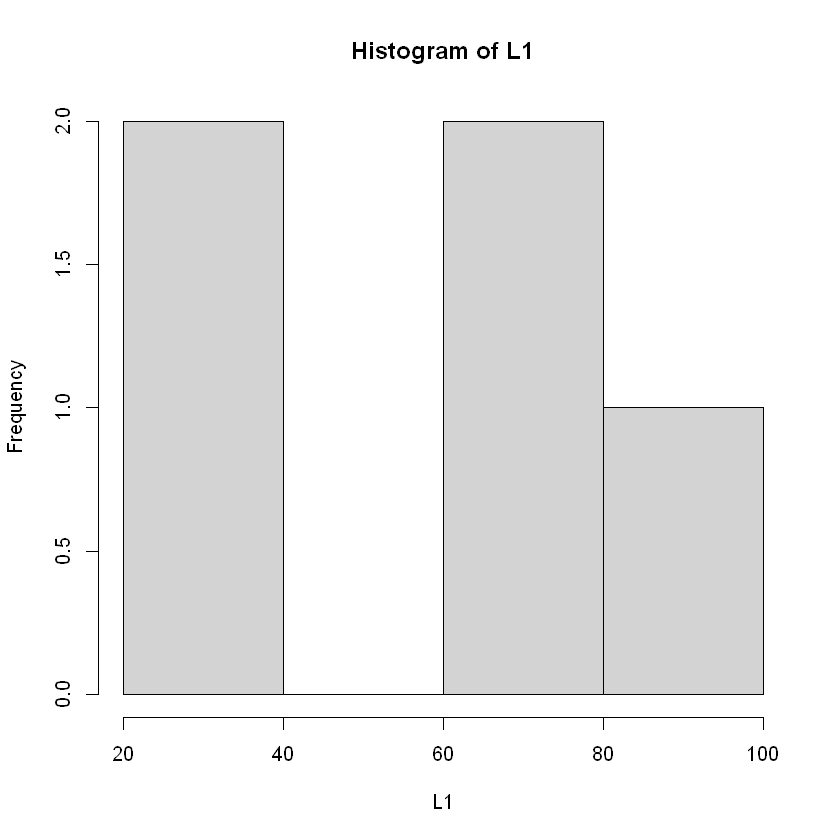

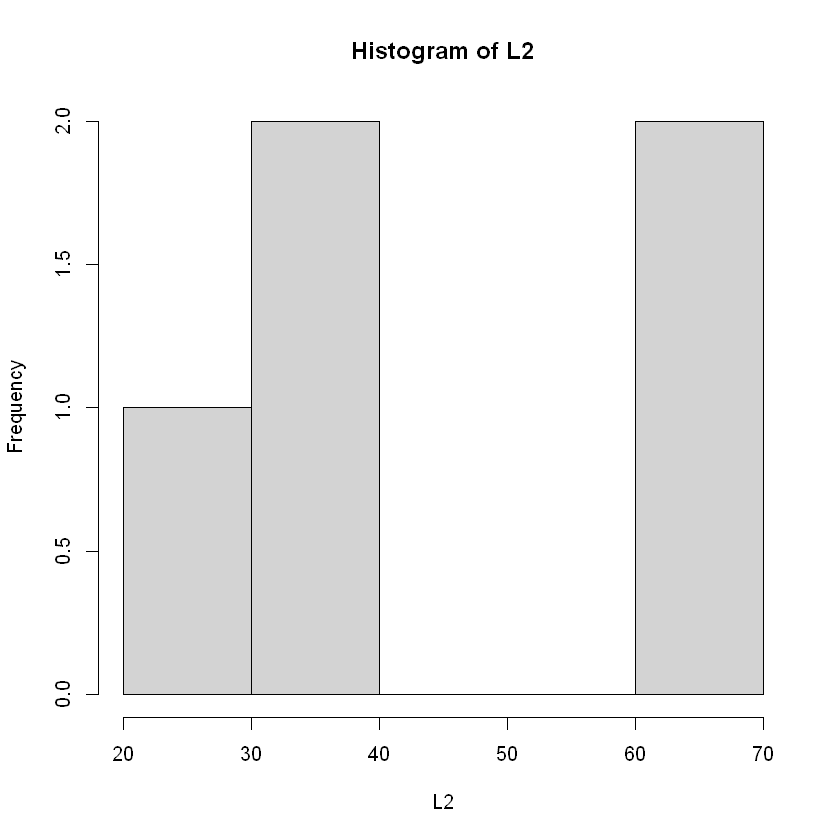

In [68]:
# Generating normal distributions with different standard deviations

set.seed(100)
N<-5


y = rnorm(n =N, mean = 0, sd = 1)
L1 = runif(n = N, min = 0, max = 100)
L2= runif(n = N, min = 0, max = 100)
L1<-round(L1,2)
L2<-round(L2,2)

L1
L2
hist(L1)
hist(L2)

[1] 62.50 88.22 28.04 39.85 76.26

[1] 66.90 20.46 35.75 35.95 69.03

[1] 53.58 71.08 53.83 74.90 42.01

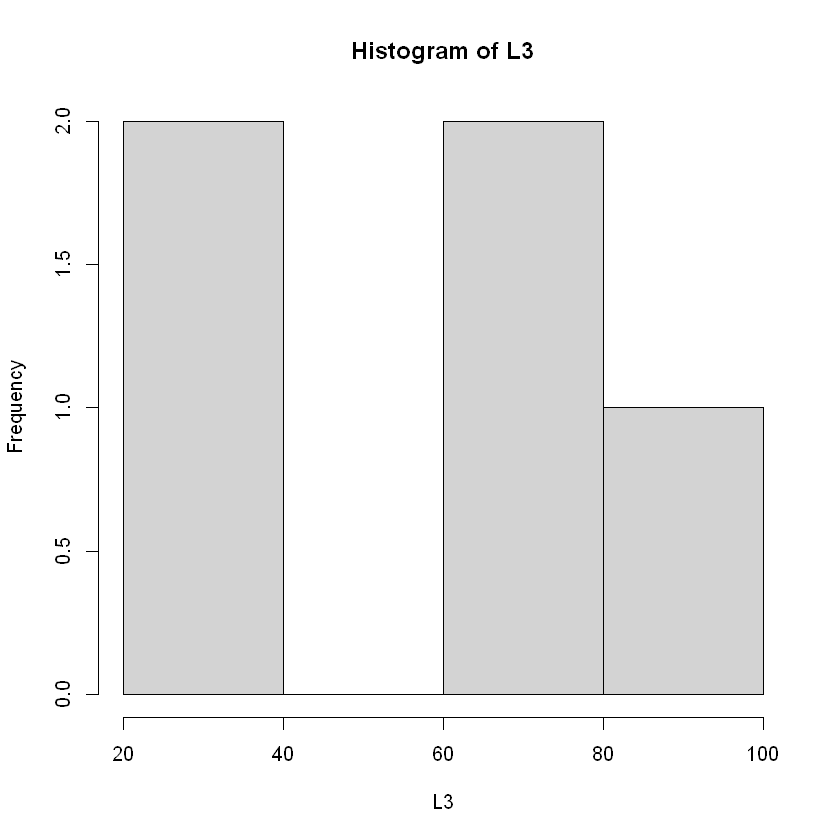

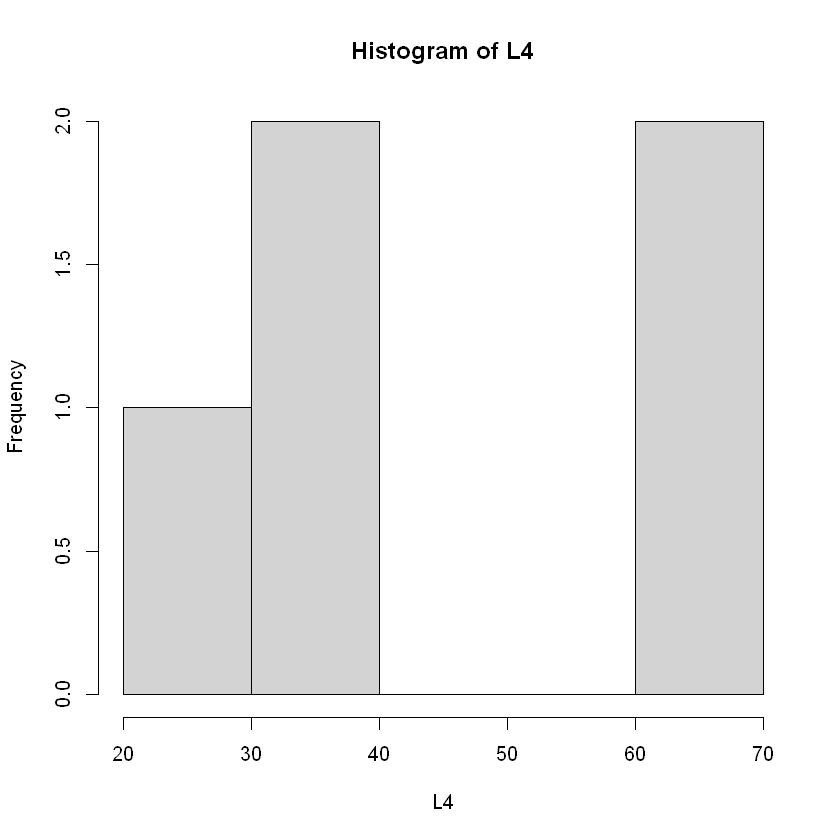

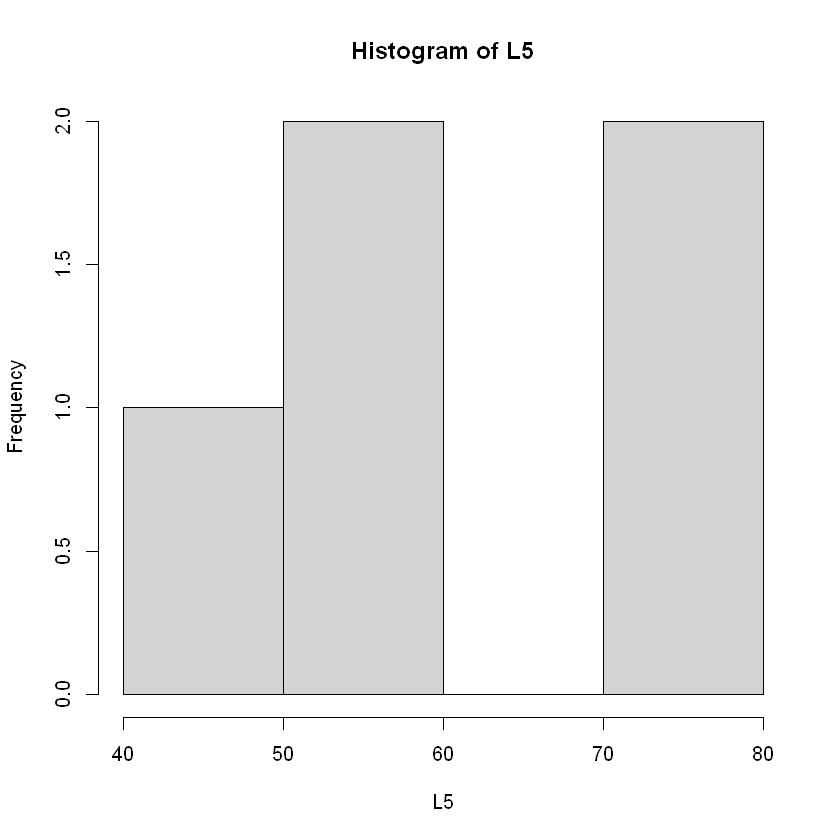

In [69]:
set.seed(100)
N<-5


y = rnorm(n =N, mean = 0, sd = 2)
L3 = runif(n = N, min = 0, max = 100)
L4= runif(n = N, min = 0, max = 100)
L5= runif(n = N, min = 0, max = 100)

L3<-round(L3,2)
L4<-round(L4,2)
L5<-round(L5,2)
L3
L4
L5
hist(L3)
hist(L4)
hist(L5)

[1] 62.50 88.22 28.04 39.85 76.26

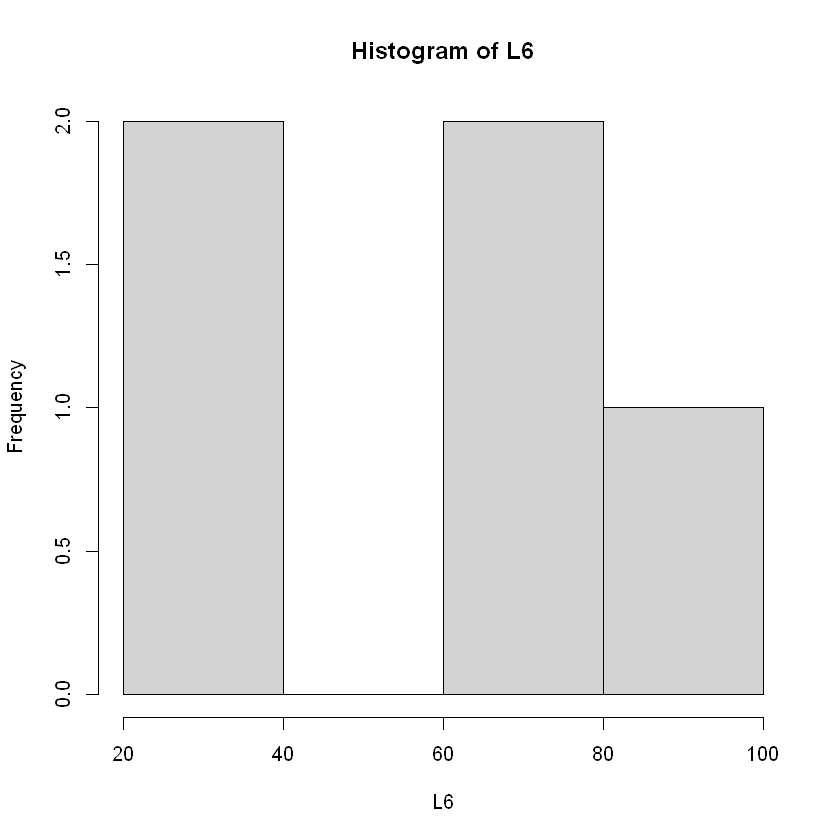

In [70]:
set.seed(100)
N<-5


y = rnorm(n =N, mean = 0, sd = 3)
L6 = runif(n = N, min = 0, max = 100)


L6<-round(L6,2)
L6
hist(L6)

[1] 62.50 88.22 28.04 39.85 76.26

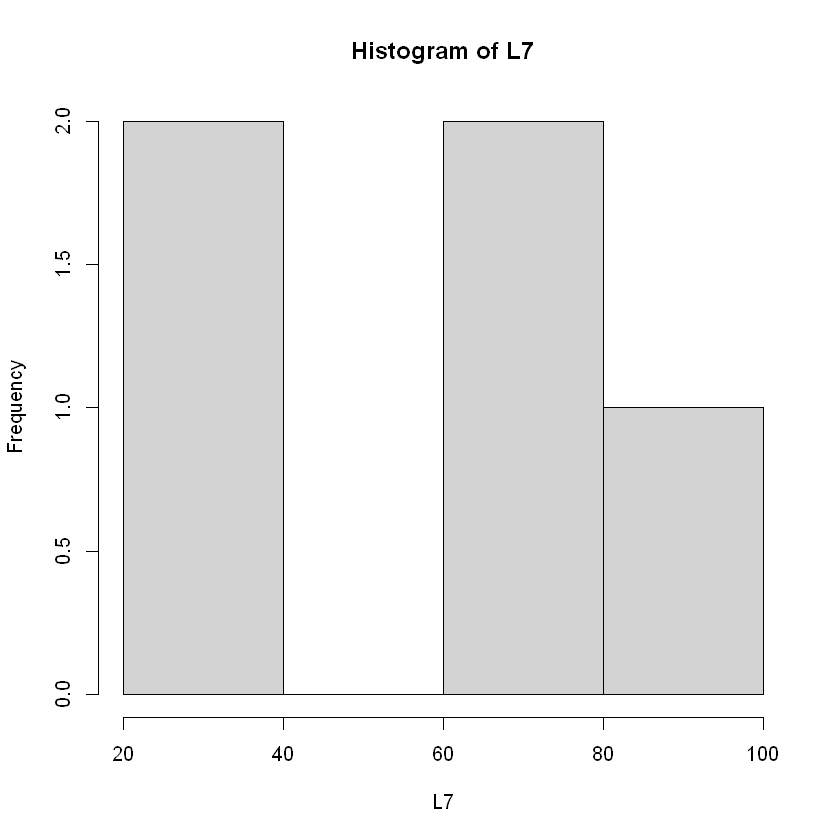

In [71]:
set.seed(100)
N<-5


y = rnorm(n =N, mean = 0, sd = 10)
L7 = runif(n = N, min = 0, max = 100)


L7<-round(L7,2)
L7
hist(L7)

In [73]:
# clubbing data generated into a matrix

data         <- matrix(0,7,5)
itemLabels   <- vector("character",4)
data[1,]   <- L1 ; itemLabels[1]   <- "L1"
data[2,]  <- L2 ; itemLabels[2]  <- "L1"
data[3,] <- L3; itemLabels[3] <- "L2"
data[4,] <- L4; itemLabels[3] <- "L2"
data[5,] <- L5; itemLabels[3] <- "L2"
data[6,] <- L6; itemLabels[3] <- "L3"
data[7,] <- L7; itemLabels[3] <- "L4"

data

62.50,88.22,28.04,39.85,76.26
66.90,20.46,35.75,35.95,69.03
62.50,88.22,28.04,39.85,76.26
66.90,20.46,35.75,35.95,69.03
53.58,71.08,53.83,74.90,42.01
62.50,88.22,28.04,39.85,76.26
62.50,88.22,28.04,39.85,76.26


In [39]:
#write.csv(data,'normaldist.csv') #writing data to csv file

In [79]:
file='C:/Users/pavle/OneDrive/Documents/normaldist.csv'

In [80]:
parser = ArgumentParser()
parser$add_argument('file', nargs=1, help='CSV with gene expression, first column gene names, first row time points')
parser$add_argument('--Pool', dest='pool', type='integer', default=0, help='Number of threads for BHC parallelisation. Default: 0 (automatic parallelisation)')
parser$add_argument('--Mode', dest='mode', default='multinomial', help='Mode of operation (multinomial/time-course). Default: multinomial')
parser$add_argument('--MakeHeatmap', dest='heatmap', action='store_true', help='Flag. If specified, a heatmap of the resulting clustering will be produced')
args = parser$parse_args(file)


In [81]:
#toy around with pool
if (args$pool==0)
{
	args$pool = detectCores()
}

In [82]:
#basic data prep
data = read.csv(args$file,header=TRUE,row.names=1,check.names=FALSE)
genes = rownames(data)
samples = colnames(data)
data = data.matrix(data)
#standardise data
standardisedData = (data-mean(data))/sd(data)

In [83]:
data

,V1,V2,V3,V4,V5
1,62.50,88.22,28.04,39.85,76.26
2,66.90,20.46,35.75,35.95,69.03
3,62.50,88.22,28.04,39.85,76.26
4,66.90,20.46,35.75,35.95,69.03
5,53.58,71.08,53.83,74.90,42.01
6,62.50,88.22,28.04,39.85,76.26
7,62.50,88.22,28.04,39.85,76.26


In [84]:
#BHC runs proper
if (args$mode == 'multinomial')
{
	#data discretisation
	percentiles = FindOptimalBinning(data, genes, transposeData=TRUE, verbose=TRUE)
	discreteData = DiscretiseData(t(data), percentiles=percentiles)
	discreteData = t(discreteData)
	hc = bhc(discreteData, genes, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	if (args$heatmap)
	{
		#cluster samples too, for the heatmap
		percentiles2 = FindOptimalBinning(data, genes, transposeData=FALSE, verbose=TRUE)
		discreteData2 = DiscretiseData(data, percentiles=percentiles2)
		discreteData2 = t(discreteData2)
		hc2 = bhc(discreteData2, samples, dataType='multinomial', numThreads=args$pool, verbose=TRUE)
		png('heatmap.png',width=8,height=6,units='in',res=300,family='mono')
		holder = par()
		rowmar = max(nchar(genes))*(0.2+1/(log10(length(genes))))*holder$cra[1]/holder$cra[2] * 3/4
		colmar = max(nchar(samples))*(0.2+1/(log10(length(samples))))*holder$cra[1]/holder$cra[2] * 2/3
		heatmap.2(standardisedData, Colv=hc2, Rowv=hc, tracecol=NA, scale="none", col=brewer.pal(11,'RdBu'), margins=1.5+c(colmar,rowmar))
		dev.off()
	}
} else {
	#get them time points as time points
	samples2 = as.numeric(samples)
	#clustering proper
	hc = bhc(standardisedData, genes, timePoints=samples2, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	if (args$heatmap)
	{
		png('heatmap.png',width=8,height=6,units='in',res=300,family='mono')
		holder = par()
		rowmar = max(nchar(genes))*(0.2+1/(log10(length(genes))))*holder$cra[1]/holder$cra[2] * 3/4
		colmar = max(nchar(samples))*(0.2+1/(log10(length(samples))))*holder$cra[1]/holder$cra[2] * 2/3
		heatmap.2(standardisedData, Colv=NA, Rowv=hc, tracecol=NA, scale="none", col=brewer.pal(11,'RdBu'), margins=1.5+c(colmar,rowmar))
		dev.off()
	}
}




DATA DISCRETISATION
-------------------
Percentiles: 0.1 0.8 0.1 
We have the following parameters for the data array:
nGenes:       7
nExperiments: 5
***Please check that these are the right way round! (it affects the discretisation)***

Discretisation logEvidence: -126.976639901581
(Need to add this to the model logEvidence)
-------------------
[1] Running Bayesian Hierarchical Clustering....
[1] "DataType: multinomial"
[1] Optimising global hyperparameter...
[1] 782.57541 -18.20282
[1] 1265.92459  -18.19814
[1] 1564.65082  -18.19669
[1] 1806.91964  -18.19587
[1] 1714.38118  -18.19616
[1] 1899.00414  -18.19562
[1] 1955.91550  -18.19547
[1] 1991.08865  -18.19538
[1] 2012.82685  -18.19533
[1] 2026.2618  -18.1953
[1] 2034.56505  -18.19528
[1] 2039.69675  -18.19527
[1] 2042.86831  -18.19526
[1] 2044.82844  -18.19525
[1] 2046.03987  -18.19525
[1] 2046.78857  -18.19525
[1] 2047.25130  -18.19525
[1] 2047.58466  -18.19525
[1] 2047.58466  -18.19525
[1] 2047.58466  -18.19525
[1] Hyperparamete

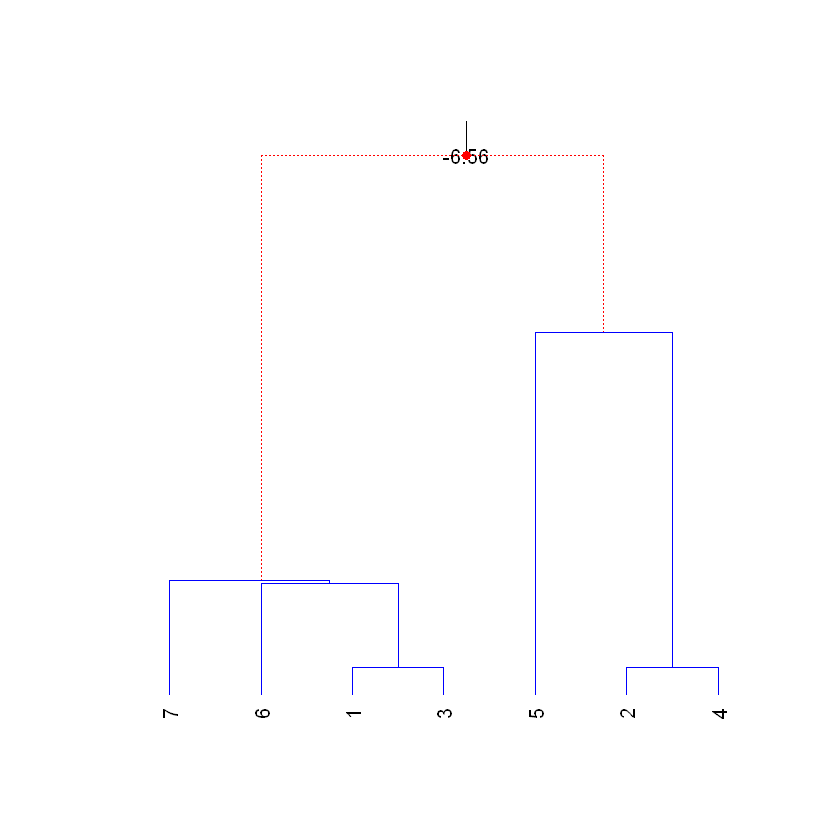

In [85]:
 
plot(hc,axes=FALSE)

In [86]:
#write out clusters
WriteOutClusterLabels(hc, 'clusters.txt', verbose=TRUE)


[1] ---CLUSTER 1 ---
[1] 7
[1] 6
[1] 1
[1] 3
[1] ---CLUSTER 2 ---
[1] 5
[1] 2
[1] 4


## Actual Clustering should have been

### Cluster 1 (mean=0,sd=1)
1
2

### Cluster 2 (mean=0,sd=2)
3
4
5

### Cluster 3 (mean=0,sd=3)
6

### Cluster 4 (mean=0,sd=10)
7

In [88]:
# if we give the class variable along with the data

file='C:/Users/pavle/OneDrive/Documents/normaldist1.csv'

In [89]:
parser = ArgumentParser()
parser$add_argument('file', nargs=1, help='CSV with gene expression, first column gene names, first row time points')
parser$add_argument('--Pool', dest='pool', type='integer', default=0, help='Number of threads for BHC parallelisation. Default: 0 (automatic parallelisation)')
parser$add_argument('--Mode', dest='mode', default='multinomial', help='Mode of operation (multinomial/time-course). Default: multinomial')
parser$add_argument('--MakeHeatmap', dest='heatmap', action='store_true', help='Flag. If specified, a heatmap of the resulting clustering will be produced')
args = parser$parse_args(file)

In [90]:
#toy around with pool
if (args$pool==0)
{
	args$pool = detectCores()
}

In [91]:
#basic data prep
data = read.csv(args$file,header=TRUE,row.names=1,check.names=FALSE)
genes = rownames(data)
samples = colnames(data)
data = data.matrix(data)
#standardise data
standardisedData = (data-mean(data))/sd(data)

In [92]:
data

,V1,V2,V3,V4,V5,class
1,62.50,88.22,28.04,39.85,76.26,1
2,66.90,20.46,35.75,35.95,69.03,1
3,62.50,88.22,28.04,39.85,76.26,2
4,66.90,20.46,35.75,35.95,69.03,2
5,53.58,71.08,53.83,74.90,42.01,2
6,62.50,88.22,28.04,39.85,76.26,3
7,62.50,88.22,28.04,39.85,76.26,4


In [93]:
#BHC runs proper
if (args$mode == 'multinomial')
{
	#data discretisation
	percentiles = FindOptimalBinning(data, genes, transposeData=TRUE, verbose=TRUE)
	discreteData = DiscretiseData(t(data), percentiles=percentiles)
	discreteData = t(discreteData)
	hc = bhc(discreteData, genes, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	if (args$heatmap)
	{
		#cluster samples too, for the heatmap
		percentiles2 = FindOptimalBinning(data, genes, transposeData=FALSE, verbose=TRUE)
		discreteData2 = DiscretiseData(data, percentiles=percentiles2)
		discreteData2 = t(discreteData2)
		hc2 = bhc(discreteData2, samples, dataType='multinomial', numThreads=args$pool, verbose=TRUE)
		png('heatmap.png',width=8,height=6,units='in',res=300,family='mono')
		holder = par()
		rowmar = max(nchar(genes))*(0.2+1/(log10(length(genes))))*holder$cra[1]/holder$cra[2] * 3/4
		colmar = max(nchar(samples))*(0.2+1/(log10(length(samples))))*holder$cra[1]/holder$cra[2] * 2/3
		heatmap.2(standardisedData, Colv=hc2, Rowv=hc, tracecol=NA, scale="none", col=brewer.pal(11,'RdBu'), margins=1.5+c(colmar,rowmar))
		dev.off()
	}
} else {
	#get them time points as time points
	samples2 = as.numeric(samples)
	#clustering proper
	hc = bhc(standardisedData, genes, timePoints=samples2, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	if (args$heatmap)
	{
		png('heatmap.png',width=8,height=6,units='in',res=300,family='mono')
		holder = par()
		rowmar = max(nchar(genes))*(0.2+1/(log10(length(genes))))*holder$cra[1]/holder$cra[2] * 3/4
		colmar = max(nchar(samples))*(0.2+1/(log10(length(samples))))*holder$cra[1]/holder$cra[2] * 2/3
		heatmap.2(standardisedData, Colv=NA, Rowv=hc, tracecol=NA, scale="none", col=brewer.pal(11,'RdBu'), margins=1.5+c(colmar,rowmar))
		dev.off()
	}
}




DATA DISCRETISATION
-------------------
Percentiles: 0.1 0.8 0.1 
We have the following parameters for the data array:
nGenes:       7
nExperiments: 6
***Please check that these are the right way round! (it affects the discretisation)***

Discretisation logEvidence: -151.100271505695
(Need to add this to the model logEvidence)
-------------------
[1] Running Bayesian Hierarchical Clustering....
[1] "DataType: multinomial"
[1] Optimising global hyperparameter...
[1] 782.57541 -37.54429
[1] 1265.92459  -37.53316
[1] 1564.65082  -37.52971
[1] 1807.02333  -37.52776
[1] 1714.44527  -37.52844
[1] 1899.06823  -37.52714
[1] 1955.95510  -37.52679
[1] 1991.11312  -37.52659
[1] 2012.84198  -37.52646
[1] 2026.27115  -37.52639
[1] 2034.57083  -37.52634
[1] 2039.70032  -37.52631
[1] 2042.8705  -37.5263
[1] 2044.82980  -37.52629
[1] 2046.04071  -37.52628
[1] 2046.78909  -37.52627
[1] 2047.25162  -37.52627
[1] 2047.58498  -37.52627
[1] 2047.58498  -37.52627
[1] 2047.58498  -37.52627
[1] Hyperparamete

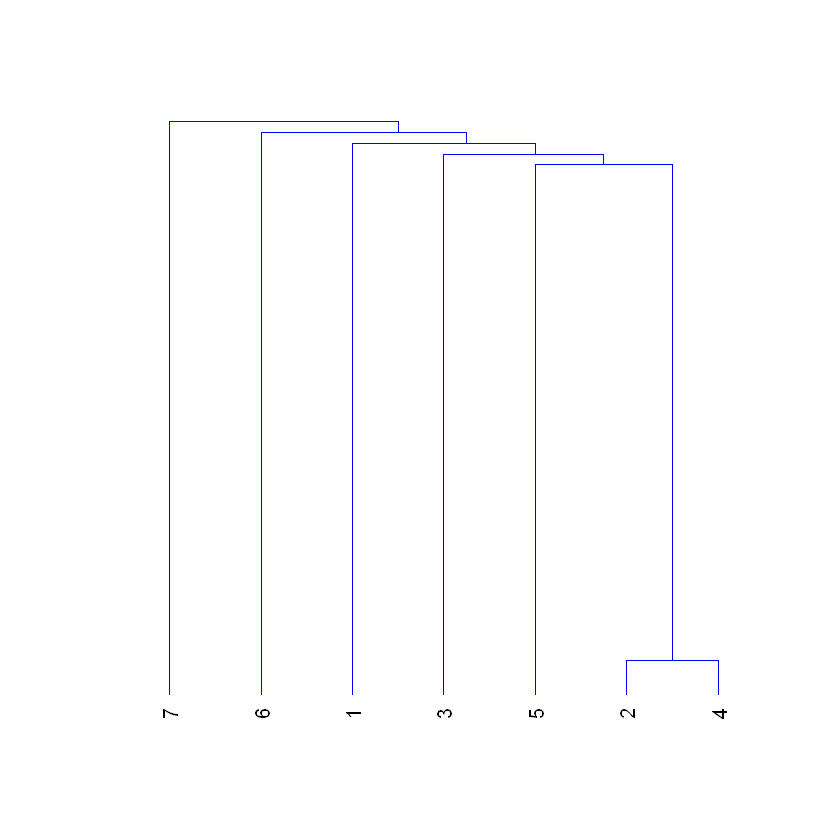

In [94]:
#Dendogram plot
plot(hc, axes=FALSE)

In [95]:
#write out clusters
WriteOutClusterLabels(hc, 'clusters.txt', verbose=TRUE)

[1] ---CLUSTER 1 ---
[1] 7
[1] ---CLUSTER 2 ---
[1] 6
[1] 1
[1] 3
[1] 5
[1] 2
[1] 4


## Actual Clustering should have been

### Cluster 1 (mean=0,sd=1)
1
2

### Cluster 2 (mean=0,sd=2)
3
4
5

### Cluster 3 (mean=0,sd=3)
6

### Cluster 4 (mean=0,sd=10)
7

## Case 3


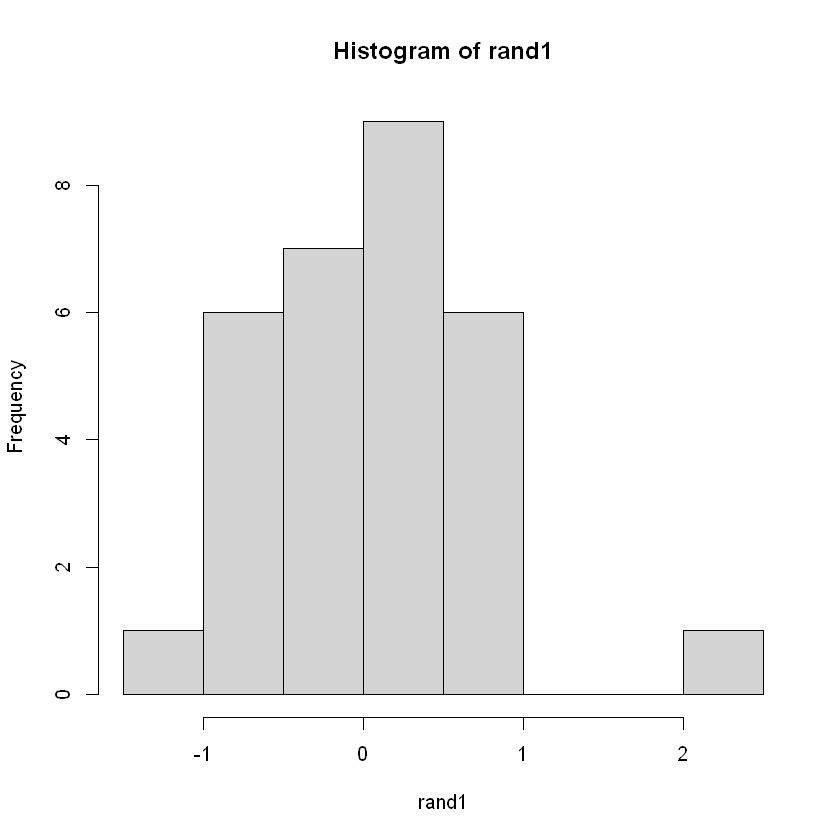

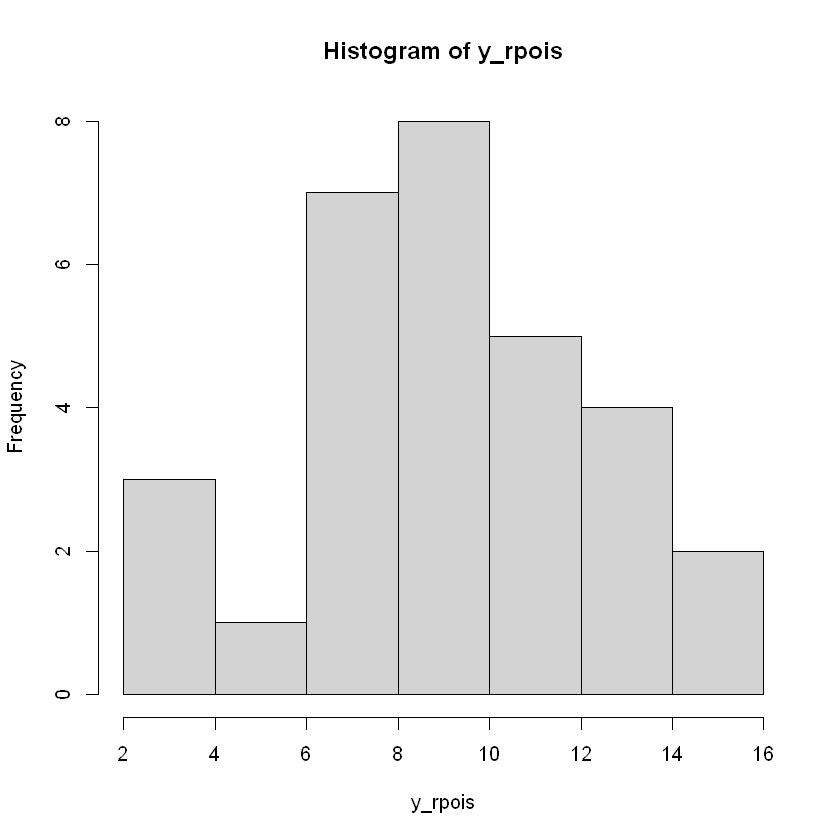

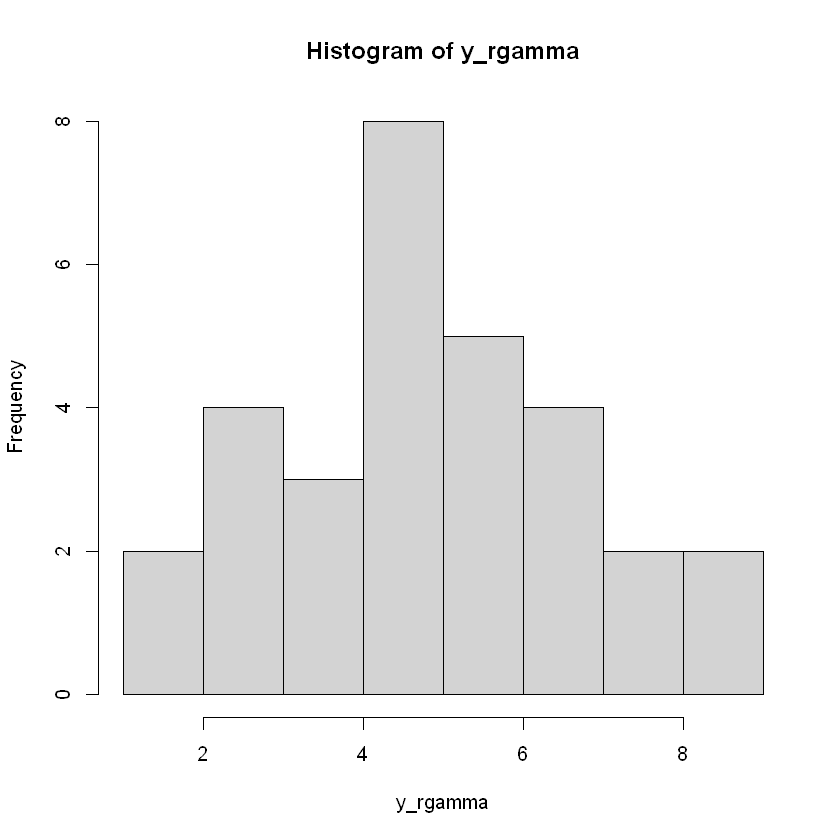

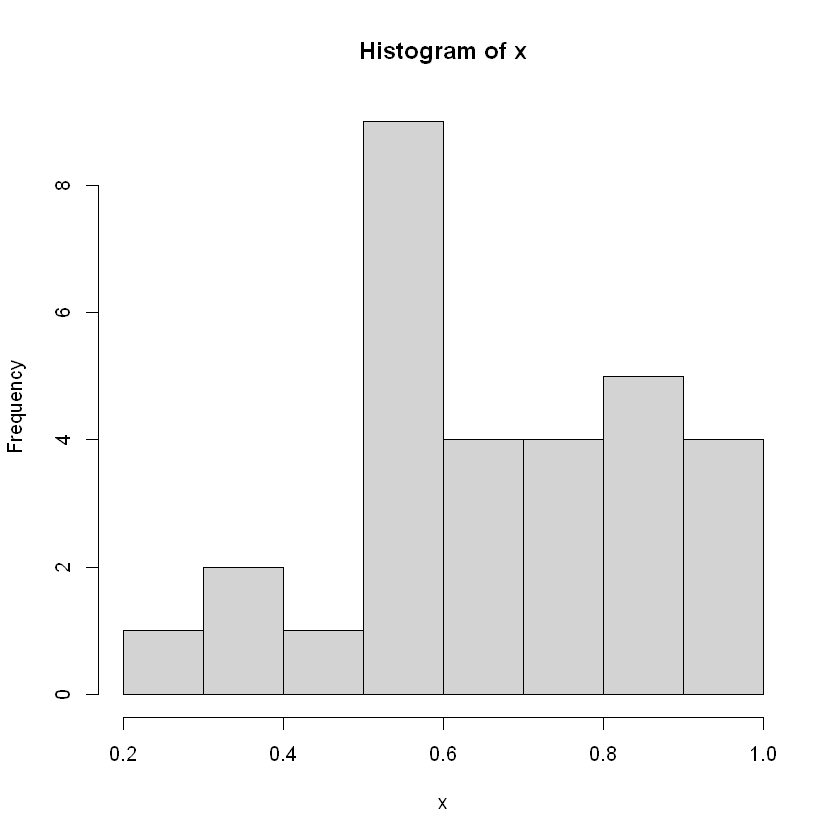

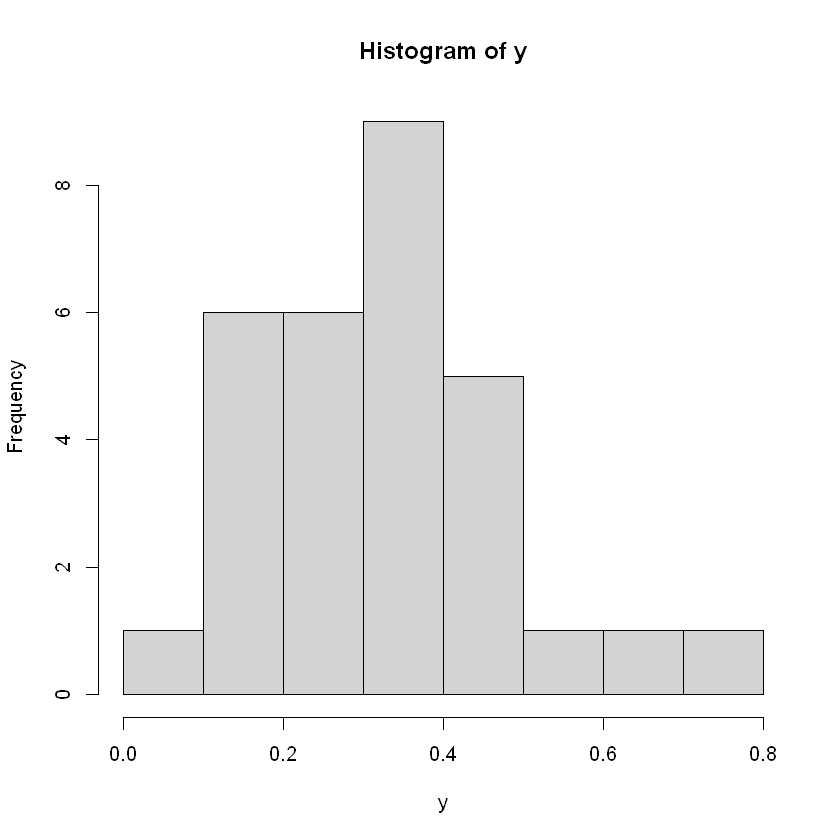

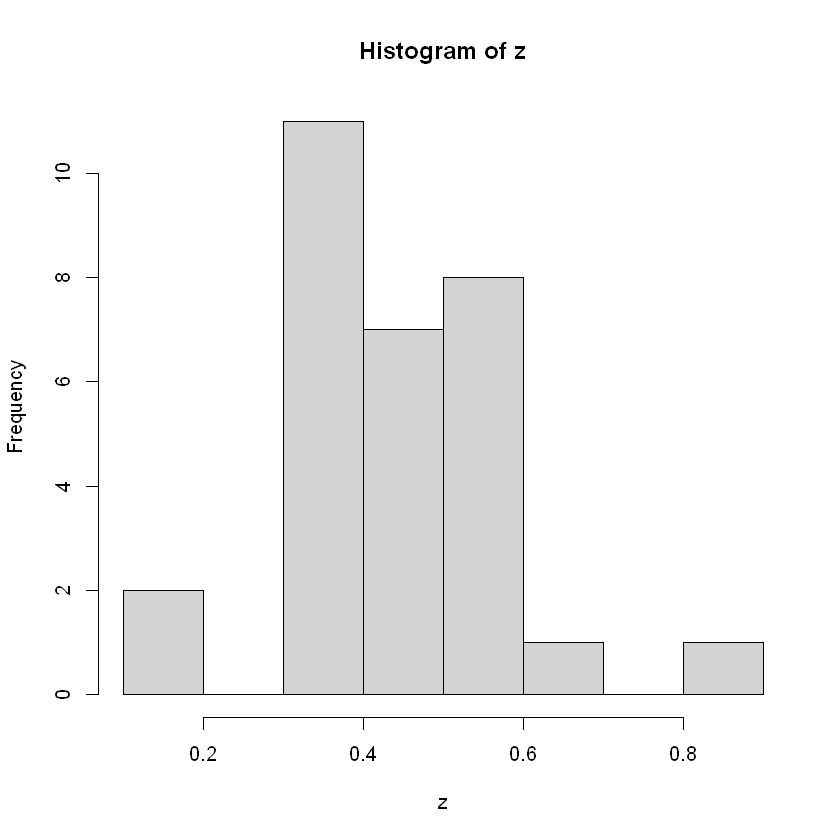

In [98]:
set.seed(100)
N<-30

#normal distribution
rand1 <- rnorm(N)
hist(rand1)

#poisson distribution
y_rpois <- rpois(N, lambda = 10) 
hist(y_rpois)

#gamma distribution
y_rgamma <- rgamma(N, shape = 5)                     # Draw N gamma distributed values

hist(y_rgamma)

#beta distributions
x<-rbeta(N,5,2)
hist (x)
y<-rbeta(N,2,5)
hist(y)
z<-rbeta(N,5,5)
hist(z)


In [99]:
file='C:/Users/pavle/OneDrive/Documents/simluated.csv'

In [100]:
parser = ArgumentParser()
parser$add_argument('file', nargs=1, help='CSV with gene expression, first column gene names, first row time points')
parser$add_argument('--Pool', dest='pool', type='integer', default=0, help='Number of threads for BHC parallelisation. Default: 0 (automatic parallelisation)')
parser$add_argument('--Mode', dest='mode', default='multinomial', help='Mode of operation (multinomial/time-course). Default: multinomial')
parser$add_argument('--MakeHeatmap', dest='heatmap', action='store_true', help='Flag. If specified, a heatmap of the resulting clustering will be produced')
args = parser$parse_args(file)

In [101]:
#basic data prep
data = read.csv(args$file,header=TRUE,row.names=1,check.names=FALSE)
genes = rownames(data)
samples = colnames(data)
data = data.matrix(data)
#standardise data
standardisedData = (data-mean(data))/sd(data)

In [102]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
rand1,-0.5021924,0.1315312,-0.07891709,0.8867848,0.1169713,0.3186301,-0.5817907,0.7145327,-0.8252594,-0.3598621,⋯,-0.4380900,0.7640606,0.2619613,0.7734046,-0.8143791,-0.4384506,-0.7202216,0.2309445,-1.1577295,0.2470760
y_rpois,9.0000000,15.0000000,9.00000000,9.0000000,7.0000000,8.0000000,15.0000000,11.0000000,12.0000000,5.0000000,⋯,11.0000000,11.0000000,10.0000000,12.0000000,7.0000000,14.0000000,7.0000000,9.0000000,10.0000000,3.0000000
y_rgamma,4.7796340,3.1145468,4.48571959,4.3529059,5.2314672,2.0784943,2.3719409,4.7031038,5.0921988,6.8934933,⋯,5.5136552,3.7096622,3.4453749,4.1705852,5.4199577,2.3469590,6.3595590,8.8570599,6.6842813,7.3067716
x,0.6536995,0.7525812,0.55705195,0.8123222,0.6412971,0.5632944,0.9504264,0.7442793,0.2833169,0.6243705,⋯,0.9463980,0.8179849,0.7758429,0.4635362,0.8891004,0.5224147,0.3811070,0.5197959,0.3707031,0.9153456
y,0.4374672,0.1014140,0.42689374,0.1306686,0.1743119,0.1496871,0.2264562,0.3896306,0.7131481,0.2025786,⋯,0.3501941,0.4725525,0.4574779,0.2911730,0.2938397,0.6297320,0.1320615,0.3055619,0.2260343,0.1490734
z,0.5634038,0.4725259,0.38295781,0.3288218,0.8021297,0.6210680,0.3304723,0.3262444,0.3409813,0.3726313,⋯,0.3881901,0.3480736,0.5125270,0.5332741,0.5688443,0.4221910,0.4460058,0.5051507,0.3737856,0.4049574


In [103]:
#BHC runs proper
if (args$mode == 'multinomial')
{
	#data discretisation
	percentiles = FindOptimalBinning(data, genes, transposeData=TRUE, verbose=TRUE)
	discreteData = DiscretiseData(t(data), percentiles=percentiles)
	discreteData = t(discreteData)
	hc = bhc(discreteData, genes, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	if (args$heatmap)
	{
		#cluster samples too, for the heatmap
		percentiles2 = FindOptimalBinning(data, genes, transposeData=FALSE, verbose=TRUE)
		discreteData2 = DiscretiseData(data, percentiles=percentiles2)
		discreteData2 = t(discreteData2)
		hc2 = bhc(discreteData2, samples, dataType='multinomial', numThreads=args$pool, verbose=TRUE)
		png('heatmap.png',width=8,height=6,units='in',res=300,family='mono')
		holder = par()
		rowmar = max(nchar(genes))*(0.2+1/(log10(length(genes))))*holder$cra[1]/holder$cra[2] * 3/4
		colmar = max(nchar(samples))*(0.2+1/(log10(length(samples))))*holder$cra[1]/holder$cra[2] * 2/3
		heatmap.2(standardisedData, Colv=hc2, Rowv=hc, tracecol=NA, scale="none", col=brewer.pal(11,'RdBu'), margins=1.5+c(colmar,rowmar))
		dev.off()
	}
} else {
	#get them time points as time points
	samples2 = as.numeric(samples)
	#clustering proper
	hc = bhc(standardisedData, genes, timePoints=samples2, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	if (args$heatmap)
	{
		png('heatmap.png',width=8,height=6,units='in',res=300,family='mono')
		holder = par()
		rowmar = max(nchar(genes))*(0.2+1/(log10(length(genes))))*holder$cra[1]/holder$cra[2] * 3/4
		colmar = max(nchar(samples))*(0.2+1/(log10(length(samples))))*holder$cra[1]/holder$cra[2] * 2/3
		heatmap.2(standardisedData, Colv=NA, Rowv=hc, tracecol=NA, scale="none", col=brewer.pal(11,'RdBu'), margins=1.5+c(colmar,rowmar))
		dev.off()
	}
}




DATA DISCRETISATION
-------------------
Percentiles: 0.1 0.8 0.1 
We have the following parameters for the data array:
nGenes:       6
nExperiments: 30
***Please check that these are the right way round! (it affects the discretisation)***

Discretisation logEvidence: 6.09994961954268
(Need to add this to the model logEvidence)
-------------------
[1] Running Bayesian Hierarchical Clustering....
[1] "DataType: multinomial"
[1] Optimising global hyperparameter...
[1]  782.5754 -120.9262
[1] 1265.9246 -120.8674
[1] 1564.6508 -120.8491
[1] 1810.5921 -120.8386
[1] 1716.6509 -120.8422
[1] 1901.2739 -120.8354
[1] 1957.3183 -120.8335
[1] 1991.9556 -120.8325
[1] 2013.3627 -120.8318
[1] 2026.5929 -120.8314
[1] 2034.7697 -120.8312
[1] 2039.823 -120.831
[1] 2042.9465 -120.8309
[1] 2044.8768 -120.8309
[1] 2046.0697 -120.8308
[1] 2046.8070 -120.8308
[1] 2047.2627 -120.8308
[1] 2047.5961 -120.8308
[1] 2047.5961 -120.8308
[1] 2047.5961 -120.8308
[1] Hyperparameter: 2047.59606525246
[1] Lower bound on

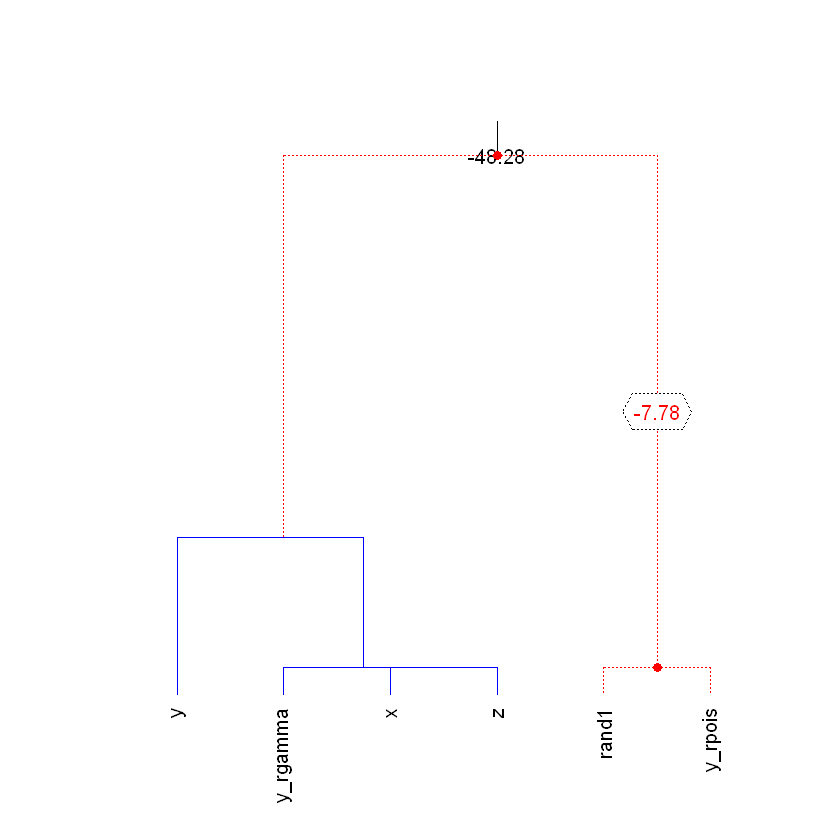

In [104]:
#Dendogram plot
plot(hc, axes=FALSE)

In [105]:
#write out clusters
WriteOutClusterLabels(hc, 'clusters.txt', verbose=TRUE)

[1] ---CLUSTER 1 ---
[1] y
[1] y_rgamma
[1] x
[1] z
[1] ---CLUSTER 2 ---
[1] rand1
[1] ---CLUSTER 3 ---
[1] y_rpois


## Actual clustering

### Cluster 1:
rand1

### Cluster 2:
y_pois

### Cluster 3:
y_gamma

### Cluster 4:
x, y and z should be separate as they are beta distributions with different parameters



## Conclusions

###  How strongly does the algorithm clustering adhere to the hypothesis that the data coming from the distribution model with same parameters should be in similar cluster

### Why has the model performed when we have taken different distributions altogether? Why has it placed the beta distributions in one cluster although within the same distribution, parameters were different?



### Why the alogrithm crashes when we take individual points and not as time series of points coming from a distribution?

### Could more features or data points in one row could be helpful in clear clustering

### Does giving class names as having some ordinal property affect the result in any way if we also add cluster class as one of the features